Heart Failure Prediction

Load Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Dataset

In [2]:
df = pd.read_csv("heart.csv")

Dataset Overview

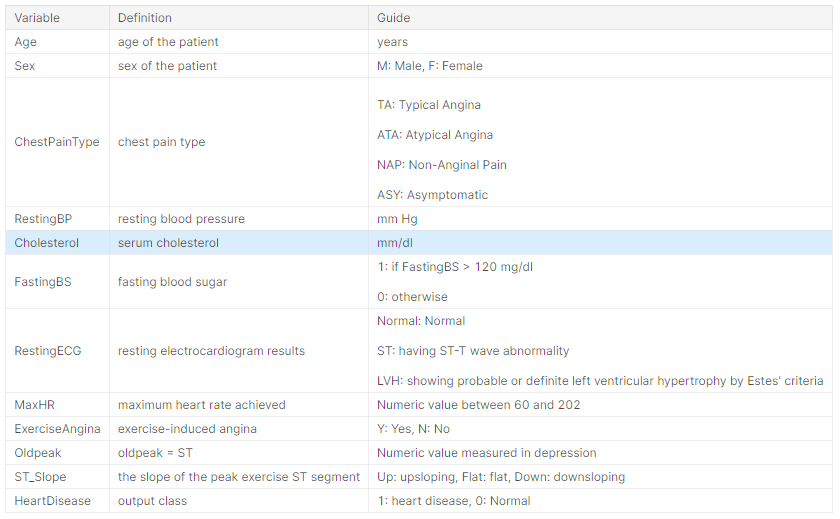

In [3]:
from IPython import display
display.Image('dataset_overview.png')

In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
df.shape

(918, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Exploratory Data Analysis

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Text(0.5, 1.0, 'Features Correlation Heatmap')

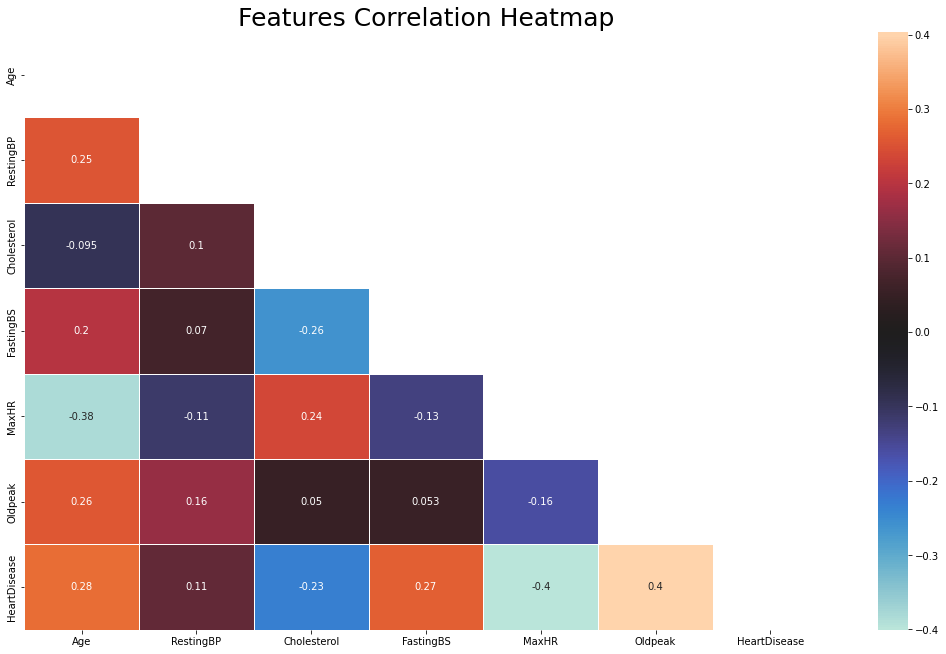

In [8]:
plt.figure(figsize=(18, 11))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),center= 0, annot=True, linewidth=0.8, mask=matrix)
plt.title('Features Correlation Heatmap', fontsize = 25)

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

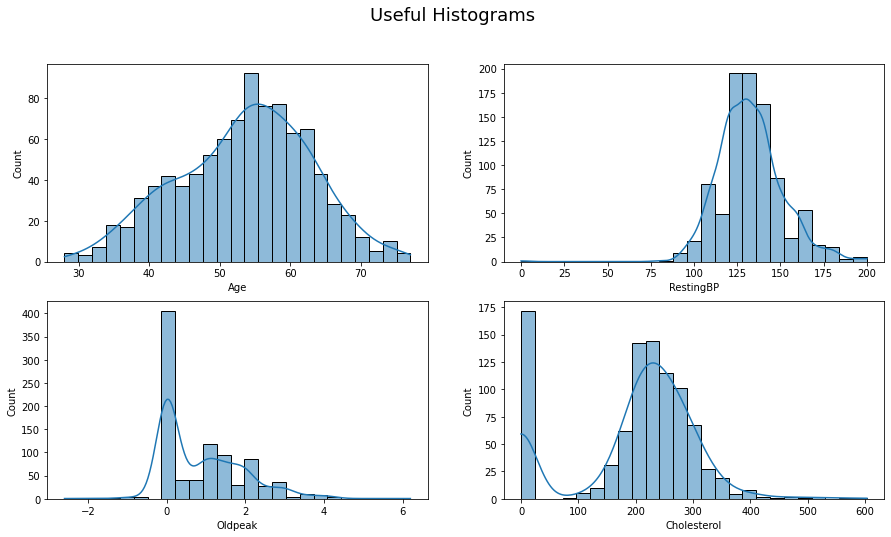

In [9]:
fig, axes = plt.subplots(2,2, figsize = (15,8))
fig.suptitle('Useful Histograms', fontsize = 18)

sns.histplot(data = df, x = 'Age', kde= True, bins = 25, ax = axes[0,0])
sns.histplot(data = df, x = 'RestingBP', kde= True, bins = 25, ax = axes[0,1])
sns.histplot(data = df, x = 'Oldpeak', kde= True, bins = 25, ax = axes[1,0])
sns.histplot(data = df, x = 'Cholesterol', kde= True, bins = 25, ax = axes[1,1])

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

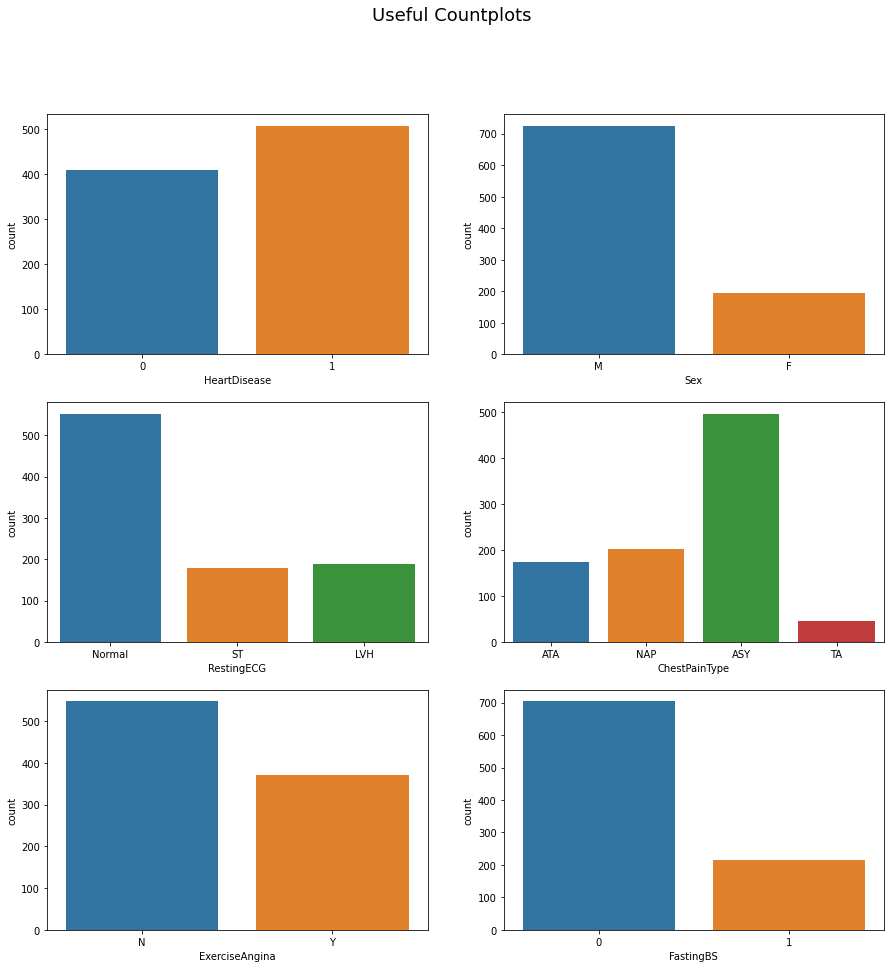

In [10]:
fig, axes = plt.subplots(3,2, figsize = (15,15))
fig.suptitle('Useful Countplots', fontsize = 18)

sns.countplot(data = df, x = 'HeartDisease', ax = axes[0,0])
sns.countplot(data = df, x = 'Sex', ax = axes[0,1])
sns.countplot(data = df, x = 'RestingECG', ax = axes[1,0])
sns.countplot(data = df, x = 'ChestPainType', ax = axes[1,1])
sns.countplot(data = df, x = 'ExerciseAngina', ax = axes[2,0])
sns.countplot(data = df, x = 'FastingBS', ax = axes[2,1])

<AxesSubplot:xlabel='FastingBS', ylabel='Cholesterol'>

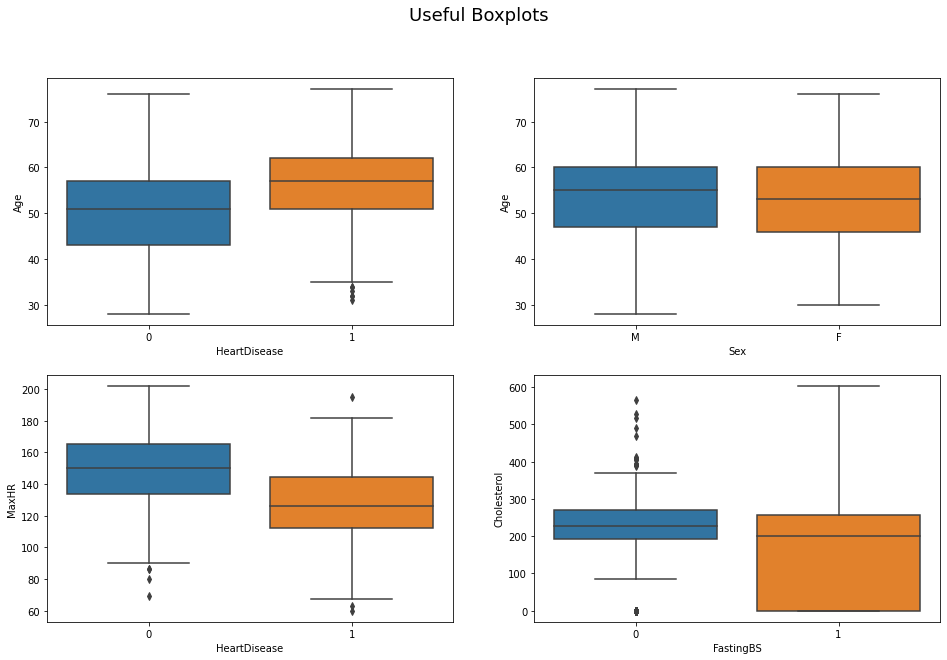

In [11]:
fig, axes = plt.subplots(2,2, figsize = (16,10))
fig.suptitle('Useful Boxplots', fontsize = 18)

sns.boxplot(data = df, x = 'HeartDisease', y = 'Age', ax = axes[0,0])
sns.boxplot(data = df, x = 'Sex', y = 'Age', ax = axes[0,1])
sns.boxplot(data = df, x = 'HeartDisease', y = 'MaxHR', ax = axes[1,0])
sns.boxplot(data = df, x = 'FastingBS', y = 'Cholesterol', ax = axes[1,1])

Data Cleaning

In [12]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no missing data in the dataset, So there is no need of Data Cleaning.
According to Oldpeak histogram there are some negative data in the dataset. We need to deal with them cause oldpeak can not be negative.

In [13]:
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


In [14]:
df.loc[df['Oldpeak']<0,'Oldpeak'] = df[df['Oldpeak']<0]['Oldpeak']*(-1)

In [15]:
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In the Cholesterol histogram, We can see there are some zero values. We want to deal with them.

In [16]:
len(df[df['Cholesterol'] == 0].index)/len(df.index)

0.18736383442265794

%18.7 of our dataset have zero cholesterol.

cholesterol is highly correlated with FastingBS So it's better to guess the cholesterol of the patients according to their FastingBS...

In this section we use the median to keep the cholesterol distribution in each fasting blood sugar class unchanged.

In [17]:
for i in range(2):
    
    df.loc[(df['Cholesterol'] == 0) & (df.FastingBS == i), 'Cholesterol'] = df[(df['FastingBS'] == i) & (df['Cholesterol'] != 0)]['Cholesterol'].median()

Next feature that need to be cleaned is RestingBP... according to the histogram it has some zero values. we know that blood pressure can not possibly be zero... and according to the heatmap RestingBP is highly correlated with Age

so same as previous feature we are going to fill the zero values of resting blood pressure...

In [18]:
df[df['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,236,0,Normal,155,N,1.5,Flat,1


In [19]:
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df['RestingBP'].median()

Categorical Features (Dummy variables)

In [20]:
df = pd.get_dummies(df, drop_first=True)

In [21]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


Modeling

In [22]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [23]:
#libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

In [24]:
def Eval_Report(model, y_pred):
    
    print('********* EVALUATION REPORT ********* \n')
    print('CONFUSION MATRIX: \n')
    print(confusion_matrix(y_test, y_pred))
    print('\nCLASSIFICATION REPORT: \n')
    print(classification_report(y_test, y_pred))
    print('\nPLOTS:\n')
    
    plot_confusion_matrix(model, X_test, y_test)
    plot_precision_recall_curve(model, X_test, y_test)
    plot_roc_curve(model, X_test, y_test)

Split the Dataset to Train and Test

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

1) Support Vector Machine

In [26]:
# libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Pipeline

In [27]:
svm_pipe = Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state = 101))])

In [28]:
param_grid = {'svm__C':[0.01,0.1,1, 10, 100, 1000],
              'svm__gamma':['auto', 'scale', 1, 0.1, 0.01, 0.001, 0.0001],
              'svm__kernel': ['rbf', 'poly'],
              'svm__shrinking': [True, False]}

svm_grid = GridSearchCV(svm_pipe,param_grid, cv=5)

In [29]:
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(random_state=101))]),
             param_grid={'svm__C': [0.01, 0.1, 1, 10, 100, 1000],
                         'svm__gamma': ['auto', 'scale', 1, 0.1, 0.01, 0.001,
                                        0.0001],
                         'svm__kernel': ['rbf', 'poly'],
                         'svm__shrinking': [True, False]})

In [30]:
svm_grid.best_params_

{'svm__C': 10,
 'svm__gamma': 0.001,
 'svm__kernel': 'rbf',
 'svm__shrinking': True}

Predict

In [31]:
ypred_svm_grid= svm_grid.predict(X_test)

Evaluation

********* EVALUATION REPORT ********* 

CONFUSION MATRIX: 

[[101  25]
 [ 18 132]]

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       126
           1       0.84      0.88      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276


PLOTS:



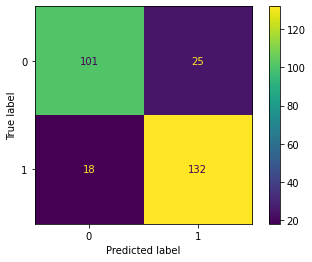

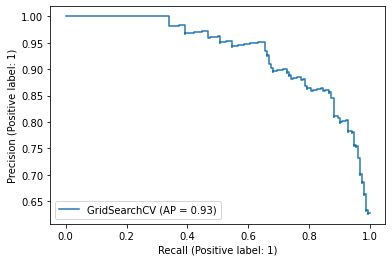

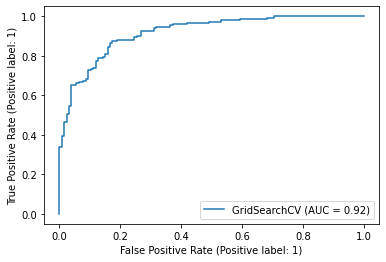

In [32]:
Eval_Report(svm_grid, ypred_svm_grid)

2) Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

Pipeline

In [34]:
DT_pipe = Pipeline([('scaler', StandardScaler()), ('DT', DecisionTreeClassifier(random_state=101))])

In [35]:
param_grid= {'DT__max_features': ['auto','sqrt','log2'],
            'DT__criterion': ['gini','entropy']}

DT_grid=GridSearchCV(DT_pipe, param_grid, cv=5)

In [36]:
DT_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('DT',
                                        DecisionTreeClassifier(random_state=101))]),
             param_grid={'DT__criterion': ['gini', 'entropy'],
                         'DT__max_features': ['auto', 'sqrt', 'log2']})

In [37]:
DT_grid.best_params_

{'DT__criterion': 'entropy', 'DT__max_features': 'auto'}

Predict

In [38]:
ypred_DT_grid = DT_grid.predict(X_test)

Evaluation

********* EVALUATION REPORT ********* 

CONFUSION MATRIX: 

[[100  26]
 [ 31 119]]

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       126
           1       0.82      0.79      0.81       150

    accuracy                           0.79       276
   macro avg       0.79      0.79      0.79       276
weighted avg       0.79      0.79      0.79       276


PLOTS:



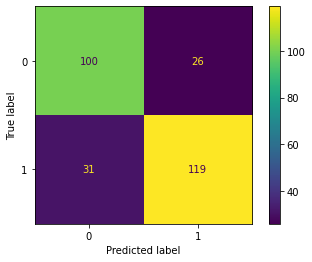

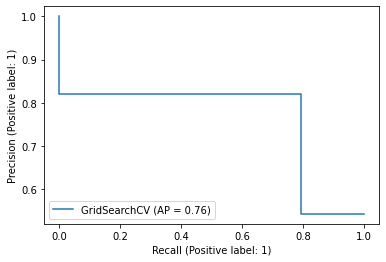

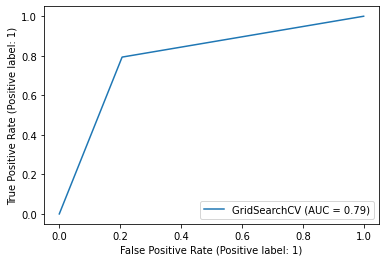

In [39]:
Eval_Report(DT_grid, ypred_DT_grid)

3) Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

Pipeline

In [41]:
RF_pipe = Pipeline([('scaler', StandardScaler()), ('RF', RandomForestClassifier(random_state=101))])

In [42]:
param_grid= {'RF__n_estimators':[64,70, 78, 88, 95, 100, 120],
            'RF__bootstrap':[True, False],
            'RF__max_features': ['auto','sqrt','log2']}

RF_grid=GridSearchCV(RF_pipe, param_grid, cv=5)

In [43]:
RF_grid.fit(X_train, y_train)


In [ ]:
RF_grid.best_params_

Predict

In [ ]:
ypred_RF_grid= RF_grid.predict(X_test)

Evaluation

In [ ]:
Eval_Report(RF_grid, ypred_RF_grid)

Conclusion

Our SVM model is the best because with the same accuracy as Random Forest it has more AP and AUC...

Decision Tree is the worst by far :)